### Author: Sai Krishna Pavan Suryatej, Meda
## Assignment-1: Data Visualization with Haberman Dataset

## (3.12) Exercise:
1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar analysis as above on this dataset with the following sections:
3. High level statistics of the dataset: number of points, numer of features, number of classes, data-points per class.
4. Explain our objective. 
5. Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
6. Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
7. Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [7]:
# Download the dataset from Kaggle
"""https://www.kaggle.com/gilsousa/habermans-survival-data-set"""
# Load the Haberman Cancer Dataset using pandas
haberman = pd.read_csv(r"F:\MachineLearning\AppliedAi\Assignment-1 EDA\haberman.csv")

In [8]:
# Shape of dataset
haberman.shape

(306, 4)

the shape implies that there are 306 rows and 4 columns

In [9]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Using describe method the 4 column names can be found out as "age", "year", "nodes", "status" and 306 instances are available

In [11]:
print (haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


Looks like there are no empty or None values in the dataframe

### Describing each column attribute
1. Age - Age of the patient at the time of operation (numerical)
2. Year - Year of Operation (numerical)
3. Nodes - Number of positive axillary nodes detected (numerical)
4. Status - Survival status (class attribute) 1 - patient survived 5 years or longer, 2 - patient died within 5 years


## So what are these axillary nodes?
Cancer cells get into the lymphatic system and get lodged in lymph nodes. The grading of cancer takes into account based on how much cancer has spread into lymph nodes.

The number of lymph nodes vary from person to person, ranging from 5 to 30.
The axillary lymph nodes are usually the first set of lymph nodes where breast cancer will spread.

Reference - https://www.medicalnewstoday.com/articles/319713.php

In [12]:
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

No of columns: 4
No of Classes: 2

So there are 225 instances of status 1 and 81 as status 2,
seems to be an imbalanced dataset

In [13]:
haberman.dtypes

age       int64
year      int64
nodes     int64
status    int64
dtype: object

just as kaggle info said, datatypes of all the columns is numeric - int64

## Objective
The primary objective in this dataset is to categorize or classify the patient record to Status 1 or Status 2, given his age, year of operation, lymph nodes

## Univaraiate Analysis, Bi-Variate Analysis
To achieve the objective lets understand the dataset how each input attribute co relates to each other and how they help in predicting the output. Is machine learning required in classifying or solving this problem? can simple if-else conditions solve, or there any linear relationships between attributes? Lets address these questions using Univariate and Bi-Variate analysis

## 2-D Scatter Plot

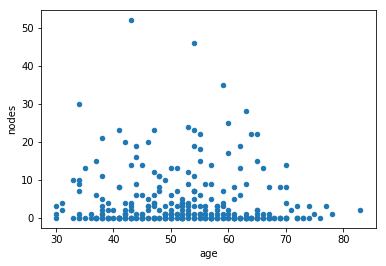

In [14]:
haberman.plot(kind="scatter",x="age", y="nodes")
plt.show()

Let's plot the same by coloring the points based on their class, using seaborn

In [15]:
help(sns.set_style)


Help on function set_style in module seaborn.rcmod:

set_style(style=None, rc=None)
    Set the aesthetic style of the plots.
    
    This affects things like the color of the axes, whether a grid is
    enabled by default, and other aesthetic elements.
    
    Parameters
    ----------
    style : dict, None, or one of {darkgrid, whitegrid, dark, white, ticks}
        A dictionary of parameters or the name of a preconfigured set.
    rc : dict, optional
        Parameter mappings to override the values in the preset seaborn
        style dictionaries. This only updates parameters that are
        considered part of the style definition.
    
    Examples
    --------
    >>> set_style("whitegrid")
    
    >>> set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    
    See Also
    --------
    axes_style : return a dict of parameters or use in a ``with`` statement
                 to temporarily set the style.
    set_context : set parameters to scale plot elements


c:\anaconda3\envs\tensorflow_test\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


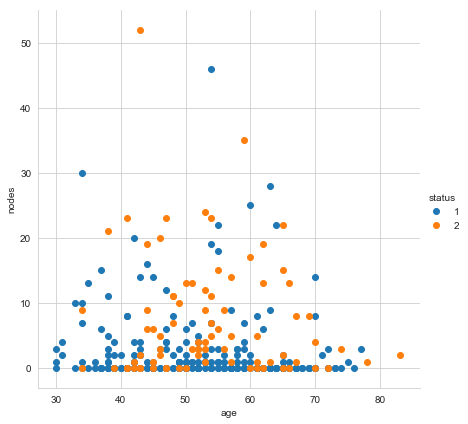

In [16]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="status", size=6).map(plt.scatter, "age", "nodes").add_legend()
plt.show()

Looks like direct information from age vs nodes is not that easy to find, let's look at the other plots

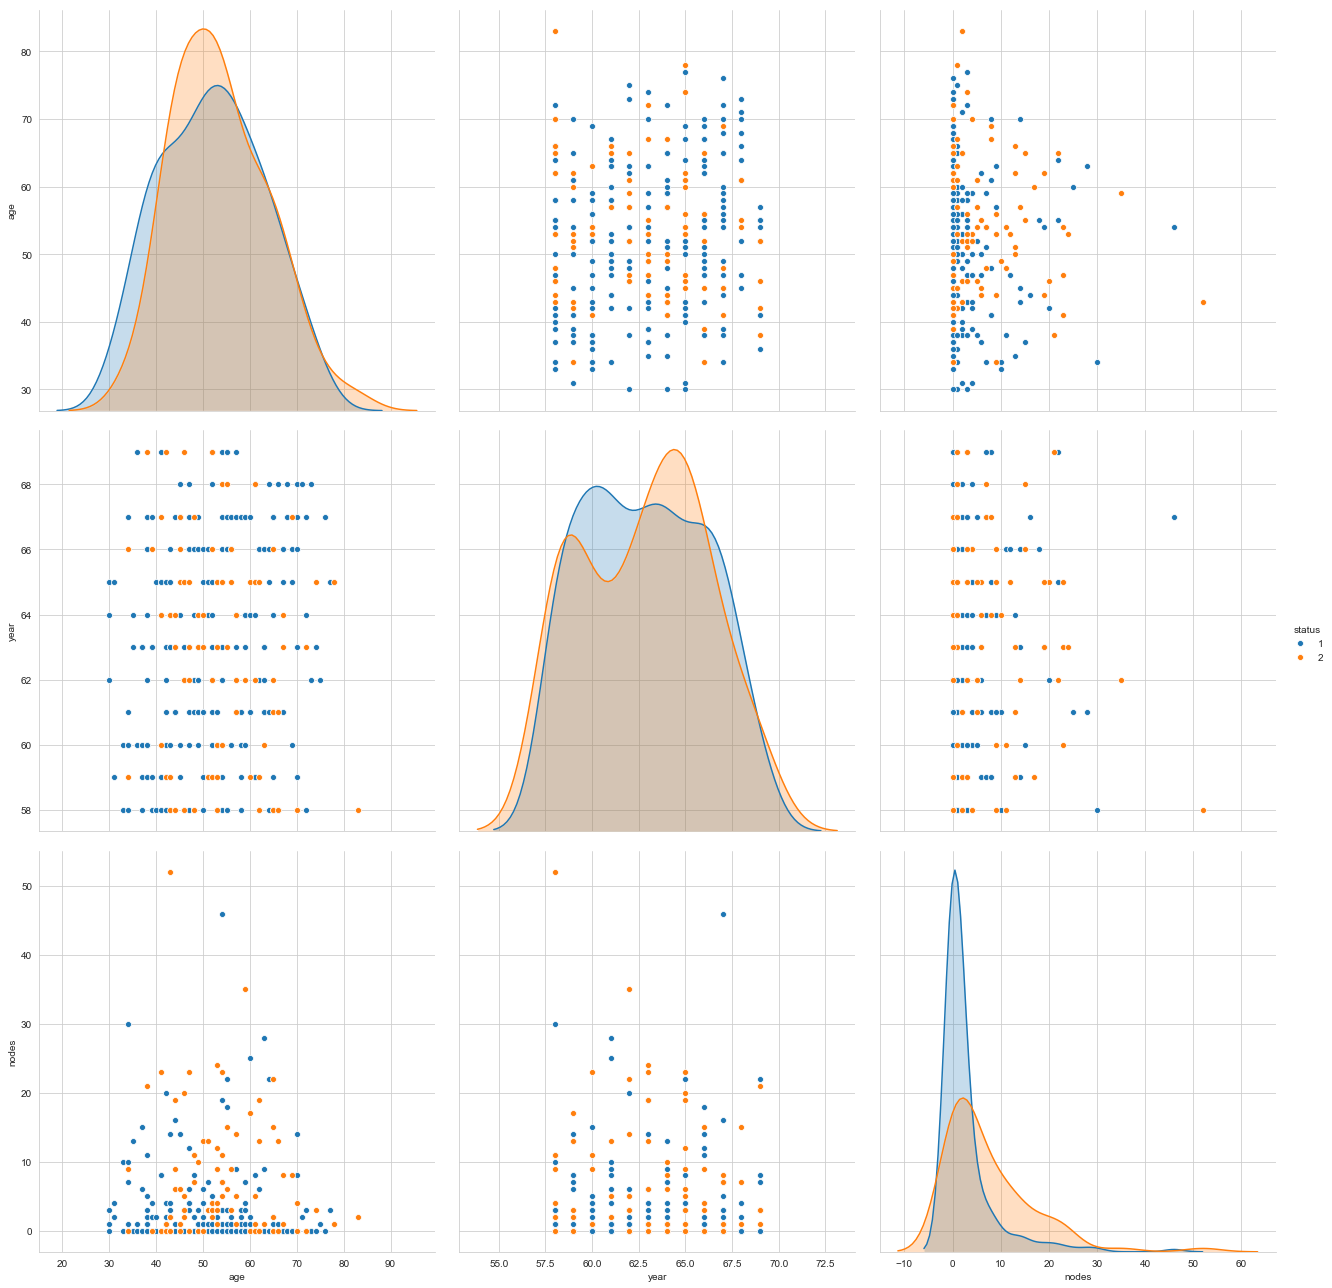

In [20]:
plt.close()
# pair plots
sns.set_style("whitegrid")
sns.pairplot(haberman, vars=["age","year","nodes"], hue="status", size=6);
plt.show()

# Histogram, PDF, CDF, Boxplot, Voilin plots

## Probability Density Functions (PDF)

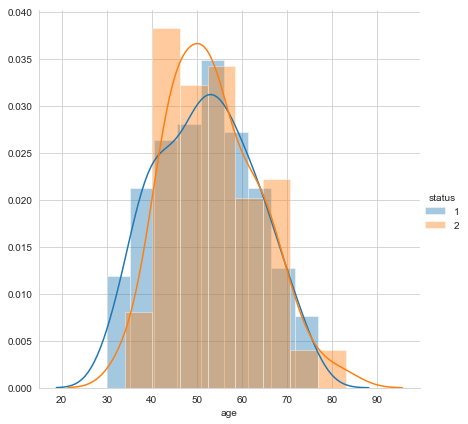

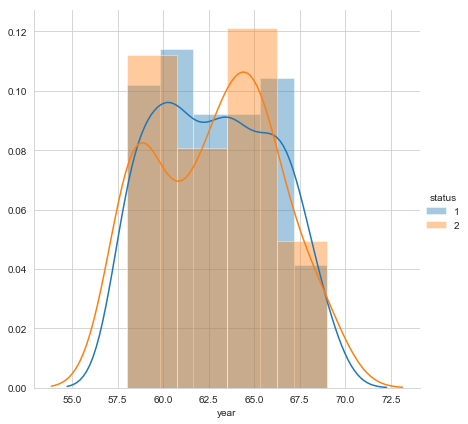

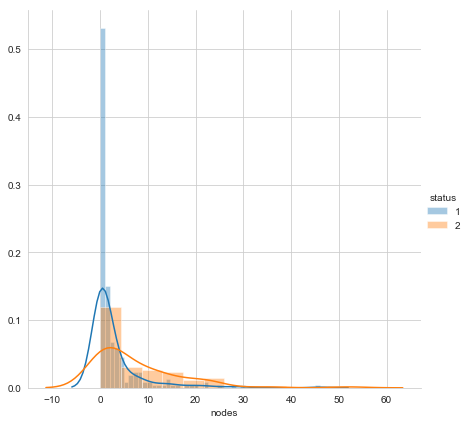

In [19]:
# PDFs

for index, input_features in enumerate(list(haberman.columns)[:-1]):
    figure = sns.FacetGrid(haberman, hue="status", height=6)
    figure.map(sns.distplot, input_features).add_legend()
    plt.show()

Here in the legend, the status value "1" impies that patient has surviced after 5 years and "2" implies patient hasn't survived.

## Cumulative Distribution Functions (CDF)
The CDF of a random variable is a method of describing the underlying distribution of random variable. It can be defined for any kind of random variable (discrete, continuous, mixed) etc. CDF calculates the cummulative probablity for a given x-value. CDF is used to determine the probablity that a random observation taken from a dataset will be less than or equal to a certain value.
The difference between CDF and PDF is, PDF is density function where are CDF is probablity itself. Integration of PDF is CDF.

In [ ]:
# cdf needs sorted data - x axis
# y axis is evenly spaced data with max of 1

In [27]:
plt.figure(figsize=(20,5))
def draw_cdfs(no_of_bins):
    for index, input_features in enumerate(list(haberman.columns)[:-1]):
        # simultaneously plotting the CDFs for the available features
        plt.subplot(1,3, index+1)
        counts, bin_edges = np.histogram(haberman[input_features], bins=no_of_bins, density=True)
        pdf = counts/sum(counts)
        cdf = np.cumsum(pdf)
        # Feature - Bin Edges - PDF - CDF
        print ("====Age====")
        print ("Bin Edges {}".format(bin_edges))
        print ("PDF {}".format(pdf))
        print ("CDF {}".format(cdf))
        # Plots
        plt.plot(bin_edges[1:], pdf, bin_edges[1:],cdf)
        plt.margins(0.02)
        plt.xlabel(input_features)
        plt.show()
        
        
    

<Figure size 1440x360 with 0 Axes>

====Age====
Bin Edges [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


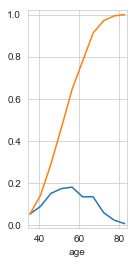

====Age====
Bin Edges [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]


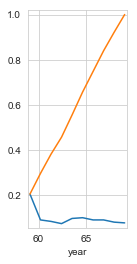

====Age====
Bin Edges [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


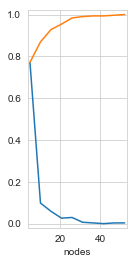

In [28]:
draw_cdfs(10)

====Age====
Bin Edges [30.   32.65 35.3  37.95 40.6  43.25 45.9  48.55 51.2  53.85 56.5  59.15
 61.8  64.45 67.1  69.75 72.4  75.05 77.7  80.35 83.  ]
PDF [0.01633987 0.03594771 0.02614379 0.0620915  0.09803922 0.05228758
 0.08169935 0.09150327 0.08169935 0.09803922 0.08496732 0.04901961
 0.06535948 0.06862745 0.01960784 0.03921569 0.01633987 0.00653595
 0.00326797 0.00326797]
CDF [0.01633987 0.05228758 0.07843137 0.14052288 0.23856209 0.29084967
 0.37254902 0.46405229 0.54575163 0.64379085 0.72875817 0.77777778
 0.84313725 0.91176471 0.93137255 0.97058824 0.9869281  0.99346405
 0.99673203 1.        ]


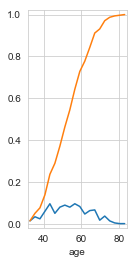

====Age====
Bin Edges [58.   58.55 59.1  59.65 60.2  60.75 61.3  61.85 62.4  62.95 63.5  64.05
 64.6  65.15 65.7  66.25 66.8  67.35 67.9  68.45 69.  ]
PDF [0.11764706 0.08823529 0.         0.09150327 0.         0.08496732
 0.         0.0751634  0.         0.09803922 0.10130719 0.
 0.09150327 0.         0.09150327 0.         0.08169935 0.
 0.04248366 0.03594771]
CDF [0.11764706 0.20588235 0.20588235 0.29738562 0.29738562 0.38235294
 0.38235294 0.45751634 0.45751634 0.55555556 0.65686275 0.65686275
 0.74836601 0.74836601 0.83986928 0.83986928 0.92156863 0.92156863
 0.96405229 1.        ]


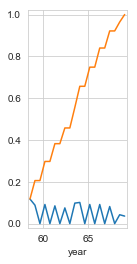

====Age====
Bin Edges [ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]
PDF [0.64379085 0.12745098 0.04575163 0.05228758 0.01960784 0.03921569
 0.00980392 0.01633987 0.02287582 0.00653595 0.00326797 0.00326797
 0.         0.00326797 0.         0.         0.         0.00326797
 0.         0.00326797]
CDF [0.64379085 0.77124183 0.81699346 0.86928105 0.88888889 0.92810458
 0.9379085  0.95424837 0.97712418 0.98366013 0.9869281  0.99019608
 0.99019608 0.99346405 0.99346405 0.99346405 0.99346405 0.99673203
 0.99673203 1.        ]


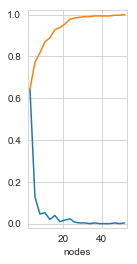

In [29]:
draw_cdfs(20)

## Box Plots
Box plots help in visualizing how the data is spread out
The important things to be noted in the box plot are
 i) Q1 - 25th percentile
 ii) Q2 - Median or 50th percentile
 iii) Q3 - 75th Percentile

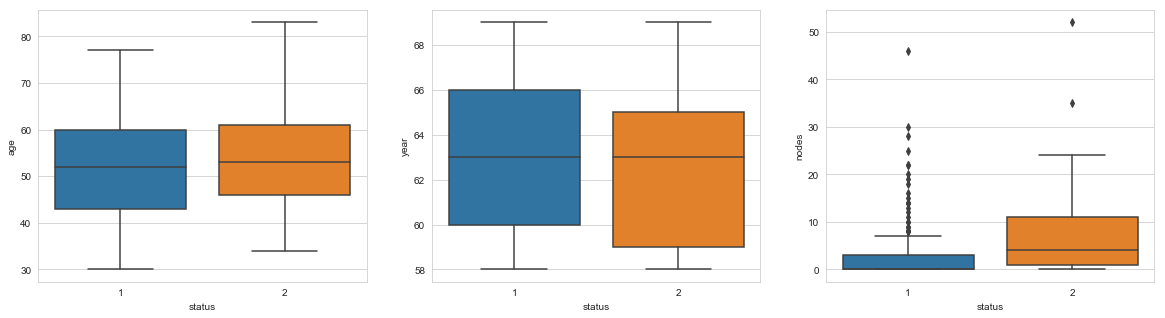

In [30]:
# showing the data in three subplots
figure, axes = plt.subplots(1,3, figsize=(20,5))
for index, input_features in enumerate(list(haberman.columns)[:-1]):
    sns.boxplot(x="status", y=input_features, data=haberman, ax=axes[index])
plt.show()

## Violin Plots
It is a combination of box plot and pdf

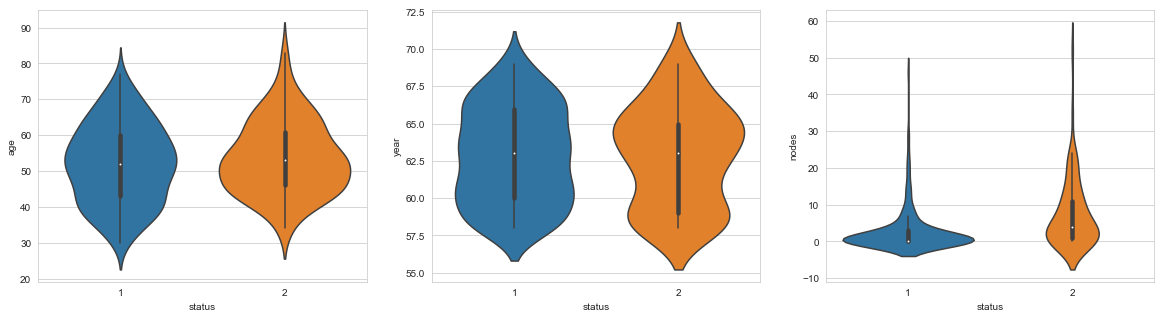

In [31]:
# showing the data in three subplots
figure, axes = plt.subplots(1,3, figsize=(20,5))
for index, input_features in enumerate(list(haberman.columns)[:-1]):
    sns.violinplot(x="status", y=input_features, data=haberman, ax=axes[index])
plt.show()

Observations

From the above plots we can see that, the number of lymph nodes for the survivors is mostly concentrated under less than 5.
Survival chance is less for the patients before the treatment years 1959 - evident from second box plot (year vs status)
Similiar patients surivival rate seems to be better for treatments after 1965 - evident from second box plot (year vs status)
From CDFs (nodes/status) it is evident that nearly 70% or more patients have less than or equal to 5 lymph nodes


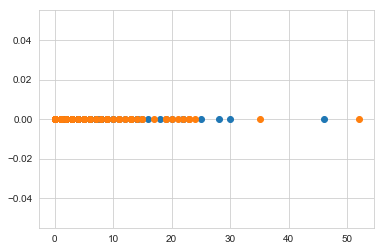

In [20]:
# univariate
haberman_status_1 = haberman.loc[haberman["status"] == 1]
haberman_status_2 = haberman.loc[haberman["status"] == 2]
plt.plot(haberman_status_1["nodes"], np.zeros_like(haberman_status_1["nodes"]), "o")
plt.plot(haberman_status_2["nodes"], np.zeros_like(haberman_status_2["nodes"]), "o")
plt.show()

Cannot make much sense out of the data in 1-D plot, due to overlapping data.